                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KPRIET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.86
              precision    recall  f1-score   support

    negative       0.86      0.85      0.86      7411
    positive       0.86      0.86      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



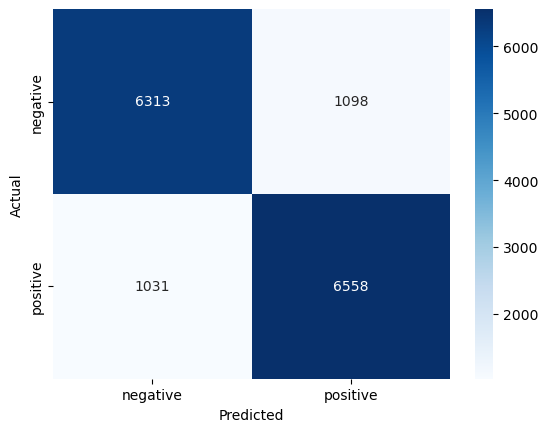

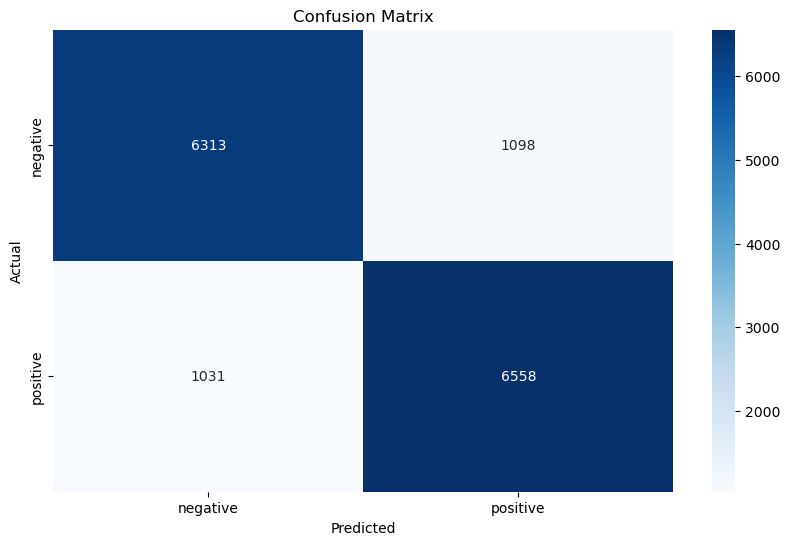

In [8]:
#Sentiment Analysis on Movie Reviews_Palanichamy Naveen
# 1. Setting up the Environment
# pip install pandas scikit-learn matplotlib seaborn nltk

# 2. Preprocessing the Data
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Data cleaning
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Remove stopwords and apply stemming
    text = ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)

# Split the data
X = df['cleaned_review']
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create a pipeline to scale the data and then apply Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler with_mean=False to handle sparse matrix
    ('classifier', LogisticRegression(max_iter=1000))
])

# 3. Training the Model

# Train the model
pipeline.fit(X_train_vec, y_train)

# 4. Making Predictions

# Make predictions on the test set
y_pred = pipeline.predict(X_test_vec)

# 5. Evaluating the Model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Visualizing the Results

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
